## **Graphic Forms and Color usage**

**Készítette:** Póra Boglárka

**Feladat:**

Készítsetek legalább 5 különböző (formájú) ábrát felhasználva legalább 3 különböző adatfájlt a visualization_5.pdf előadásban megadottak közül.

Figyeljetek arra, hogy az elkészített ábrák logikusak, szépek, helyesek és részletesen kidolgozottak legyenek.

Segítséget a visualization_4.pdf előadásban kaptok, ahol a diagramok formájáról és színezéséről beszéltünk.

### **Könyvtárak és adatok importálása**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
!pip install pyvis
from pyvis.network import Network
import collections
import numpy as np
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00


In [2]:
url_network = 'https://raw.githubusercontent.com/vlewir/adatvizualizacio/refs/heads/main/stack_overflow_network_links.csv'
df_network = pd.read_csv(url_network)
df_network.head()

source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925

In [3]:
url_weather = 'https://raw.githubusercontent.com/vlewir/adatvizualizacio/main/weatherHistory_Szeged_2006-2016.csv'
df_weather = pd.read_csv(url_weather)
df_weather.head()

Formatted Date  Temperature (C)  Apparent Temperature (C)  \
0  2006-04-01 00:00:00.000+0200         9.472222                  7.388889   
1  2006-04-01 01:00:00.000+0200         9.355556                  7.227778   
2  2006-04-01 02:00:00.000+0200         9.377778                  9.377778   
3  2006-04-01 03:00:00.000+0200         8.288889                  5.944444   
4  2006-04-01 04:00:00.000+0200         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                     251          15.8263   
1      0.86            14.2646                     259          15.8263   
2      0.89             3.9284                     204          14.9569   
3      0.83            14.1036                     269          15.8263   
4      0.83            11.0446                     259          15.8263   

   Pressure (millibars)  
0               1015.13  
1               1015.63  
2               1015.94  
3               1016.41  
4               1016.51

In [4]:
url_sb = 'https://raw.githubusercontent.com/vlewir/adatvizualizacio/main/Starbucks_survey.csv'
df_sb = pd.read_csv(url_sb)
df_sb.head()

Timestamp 1. Your Gender    2. Your Age  \
0  2019/10/01 12:38:43 PM GMT+8         Female  From 20 to 29   
1  2019/10/01 12:38:54 PM GMT+8         Female  From 20 to 29   
2  2019/10/01 12:38:56 PM GMT+8           Male  From 20 to 29   
3  2019/10/01 12:39:08 PM GMT+8         Female  From 20 to 29   
4  2019/10/01 12:39:20 PM GMT+8           Male  From 20 to 29   

  3. Are you currently....? 4. What is your annual income?  \
0                   Student             Less than RM25,000   
1                   Student             Less than RM25,000   
2                  Employed             Less than RM25,000   
3                   Student             Less than RM25,000   
4                   Student             Less than RM25,000   

  5. How often do you visit Starbucks? 6. How do you usually enjoy Starbucks?  \
0                               Rarely                                Dine in   
1                               Rarely                              Take away   
2                              Monthly                                Dine in   
3                               Rarely                              Take away   
4                              Monthly                              Take away   

  7. How much time do you normally  spend during your visit?  \
0                       Between 30 minutes to 1 hour           
1                                   Below 30 minutes           
2                       Between 30 minutes to 1 hour           
3                                   Below 30 minutes           
4                       Between 30 minutes to 1 hour           

  8. The nearest Starbucks's outlet to you is...?  \
0                                      within 1km   
1                                       1km - 3km   
2                                   more than 3km   
3                                   more than 3km   
4                                       1km - 3km   

  9. Do you have Starbucks membership card?  ...  \
0                                       Yes  ...   
1                                       Yes  ...   
2                                       Yes  ...   
3                                        No  ...   
4                                        No  ...   

  11. On average, how much would you spend at Starbucks per visit?  \
0                                     Less than RM20                 
1                                     Less than RM20                 
2                                     Less than RM20                 
3                                     Less than RM20                 
4                                 Around RM20 - RM40                 

  12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:  \
0                                                  4                                                                       
1                                                  4                                                                       
2                                                  4                                                                       
3                                                  2                                                                       
4                                                  3                                                                       

   13. How would you rate the price range at Starbucks?  \
0                                                  3      
1                                                  3      
2                                                  3      
3                                                  1      
4                                                  3      

   14. How important are sales and promotions in your purchase decision?  \
0                                                  5                       
1                                                  4                       
2    

### **Színskála**

In [5]:
sns.set_style("white")
palette = sns.color_palette("flare")
palette_cont = sns.color_palette("flare", as_cmap=True)

In [6]:
palette

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

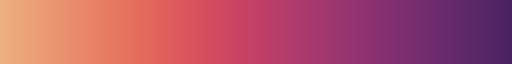

In [7]:
palette_cont

In [8]:
label_color = '#605f5e'

### **Stack Overflow Network**

In [9]:
df_network.head()

source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925

In [10]:
G = nx.from_pandas_edgelist(df_network, 'source', 'target', edge_attr='value')

**Degree Distribution of the Stack Overflow Network** - Bar Chart

deg - degree of the node

cnt - frequency of that degree value

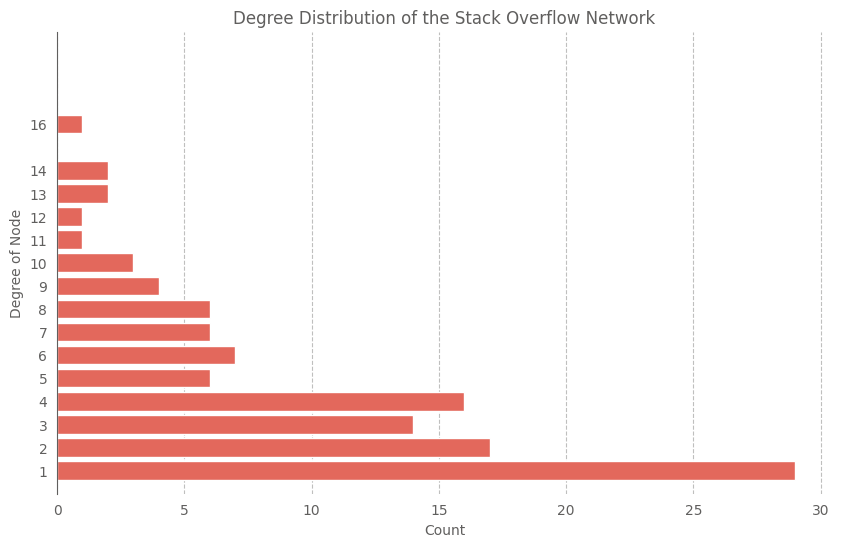

In [11]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(10, 6))
plt.barh(deg, cnt, color=palette[1], height=0.8)
plt.title("Degree Distribution of the Stack Overflow Network", color=label_color, fontsize=12)
plt.xlabel("Count", color=label_color)
plt.ylabel("Degree of Node", color=label_color)
plt.ylim(0, 20)

plt.yticks(ticks=deg, labels=deg, color=label_color)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_color(label_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(True, axis='x', color=label_color, linestyle='--', alpha=0.4)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.show()

**Network Visualization** - Network Chart

library: PyVis

node size: based on degree centrality

(html file attached)

In [12]:
degree_cent = G.degree(weight='value')
degree_cent = dict(degree_cent)
degree_cent = {node: centrality / (len(G.nodes()) - 1) for node, centrality in degree_cent.items()}

In [13]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="#ffffff", cdn_resources='in_line')
nx.set_node_attributes(G, {node: degree * 10 for node, degree in degree_cent.items()}, "size")
nx.set_node_attributes(G, '#e3685c', "color")
net.from_nx(G)
net.show("stack_overflow_network.html")

stack_overflow_network.html


## **Weather History**

In [14]:
df_weather.head()

Formatted Date  Temperature (C)  Apparent Temperature (C)  \
0  2006-04-01 00:00:00.000+0200         9.472222                  7.388889   
1  2006-04-01 01:00:00.000+0200         9.355556                  7.227778   
2  2006-04-01 02:00:00.000+0200         9.377778                  9.377778   
3  2006-04-01 03:00:00.000+0200         8.288889                  5.944444   
4  2006-04-01 04:00:00.000+0200         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                     251          15.8263   
1      0.86            14.2646                     259          15.8263   
2      0.89             3.9284                     204          14.9569   
3      0.83            14.1036                     269          15.8263   
4      0.83            11.0446                     259          15.8263   

   Pressure (millibars)  
0               1015.13  
1               1015.63  
2               1015.94  
3               1016.41  
4               1016.51

**Daily Average Temperatues and Apparent Temperatures in 2008** - Line Chart

The dataframe is filtered for the year 2008 and the temperature values are aggregated daily.

In [15]:
df_weather['Formatted Date'] = pd.to_datetime(df_weather['Formatted Date'], utc=True)

filtered_data = df_weather[(df_weather['Formatted Date'] >= '2008-01-01') &
                             (df_weather['Formatted Date'] <= '2008-12-31')]
daily_data = filtered_data.resample('D', on='Formatted Date').mean()

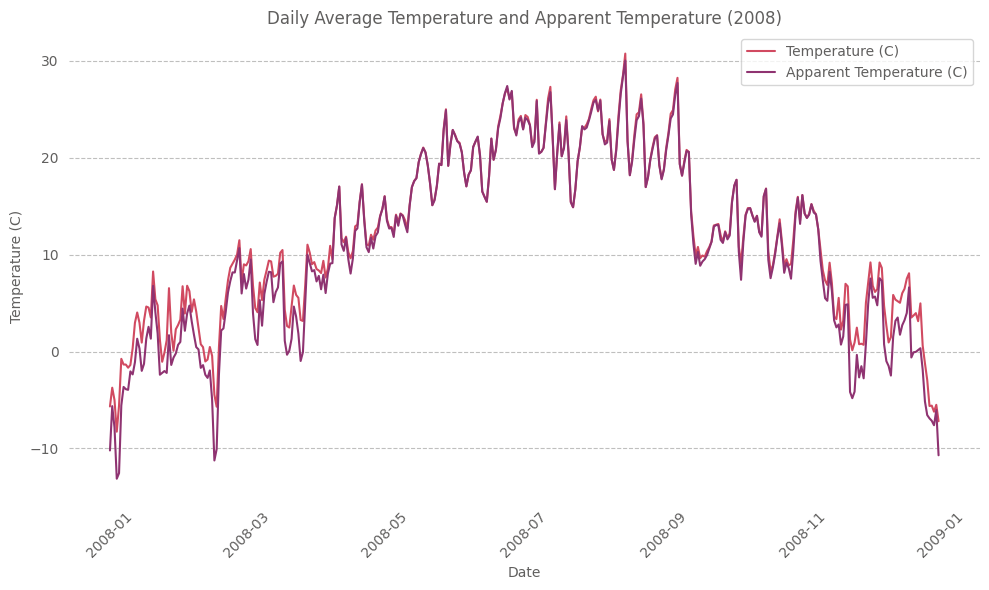

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['Temperature (C)'], label='Temperature (C)', color=palette[2])
plt.plot(daily_data.index, daily_data['Apparent Temperature (C)'], label='Apparent Temperature (C)', color=palette[4])

plt.xlabel('Date', color=label_color)
plt.ylabel('Temperature (C)', color=label_color)
plt.title('Daily Average Temperature and Apparent Temperature (2008)', color=label_color, fontsize=12)

legend = plt.legend()
plt.setp(legend.get_texts(), color=label_color)
plt.grid(False)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.grid(True, axis='y', color=label_color, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**The Relationship between Temperature and Humidity in 2008** - Scatter Chart

The dataframe is filtered for the year 2008.

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Temperature (C)'], filtered_data['Humidity'], alpha=0.5, color=palette[3])

plt.xlabel('Temperature (C)', color=label_color)
plt.ylabel('Humidity', color=label_color)
plt.title('Temperature vs. Humidity (2008)', color=label_color, fontsize=12)

plt.grid(False)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.tight_layout()
plt.show()

**Temperature Distribution by Hour of the Day** - Violin Chart

The width of the violin at any given temperature represents the density of data points at that temperature.

A wider section means that there are more temperature observations at that value for the given hour.

A narrower section means that there are fewer observations at that temperature for the given hour.


In [18]:
df_weather['Hour'] = df_weather['Formatted Date'].dt.hour

plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df_weather['Hour'], y=df_weather['Temperature (C)'], color=palette[0])

plt.title('Temperature Distribution by Hour of the Day', fontsize=12, color=label_color)
plt.xlabel('Hour of the Day', color=label_color)
plt.ylabel('Temperature (C)', color=label_color)

for violin in ax.collections:
    violin.set_edgecolor(label_color)
    violin.set_linewidth(0.5)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.grid(True, axis='y', color=label_color, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

## **Starbucks Survey**

In [19]:
df_sb.columns = [
    'Timestamp', 'Gender', 'Age', 'Occupation', 'Income', 'Visit Frequency', 'Enjoyment Method',
    'Time Spent', 'Nearest Outlet', 'Membership', 'Purchase Type', 'Spending per Visit', 'Quality Rating',
    'Price Rating', 'Promotion Importance', 'Ambience Rating', 'WiFi Rating', 'Service Rating',
    'Business Meeting Likelihood', 'Promotion Awareness', 'Continue Buying'
]

In [20]:
df_sb.head()

Timestamp  Gender            Age Occupation  \
0  2019/10/01 12:38:43 PM GMT+8  Female  From 20 to 29    Student   
1  2019/10/01 12:38:54 PM GMT+8  Female  From 20 to 29    Student   
2  2019/10/01 12:38:56 PM GMT+8    Male  From 20 to 29   Employed   
3  2019/10/01 12:39:08 PM GMT+8  Female  From 20 to 29    Student   
4  2019/10/01 12:39:20 PM GMT+8    Male  From 20 to 29    Student   

               Income Visit Frequency Enjoyment Method  \
0  Less than RM25,000          Rarely          Dine in   
1  Less than RM25,000          Rarely        Take away   
2  Less than RM25,000         Monthly          Dine in   
3  Less than RM25,000          Rarely        Take away   
4  Less than RM25,000         Monthly        Take away   

                     Time Spent Nearest Outlet Membership  ...  \
0  Between 30 minutes to 1 hour     within 1km        Yes  ...   
1              Below 30 minutes      1km - 3km        Yes  ...   
2  Between 30 minutes to 1 hour  more than 3km        Yes  ...   
3              Below 30 minutes  more than 3km         No  ...   
4  Between 30 minutes to 1 hour      1km - 3km         No  ...   

   Spending per Visit Quality Rating  Price Rating  Promotion Importance  \
0      Less than RM20              4             3                     5   
1      Less than RM20              4             3                     4   
2      Less than RM20              4             3                     4   
3      Less than RM20              2             1                     4   
4  Around RM20 - RM40              3             3                     4   

   Ambience Rating  WiFi Rating  Service Rating  Business Meeting Likelihood  \
0                5            4               4                            3   
1                4            4               5                            2   
2                4            4               4                            3   
3                3            3               3                            3   
4                2            2               3                            3   

                                 Promotion Awareness Continue Buying  
0  Starbucks Website/Apps;Social Media;Emails;Dea...             Yes  
1                     Social Media;In Store displays             Yes  
2                       In Store displays;Billboards             Yes  
3                  Through friends and word of mouth              No  
4                Starbucks Website/Apps;Social Media             Yes  

[5 rows x 21 columns]

**Correlation Heatmap of Ratings and Likelihoods** - Correlation Heatmap

Based on renamed variables

In [21]:
columns_to_convert = ['Ambience Rating', 'WiFi Rating', 'Service Rating',
                      'Business Meeting Likelihood', 'Price Rating', 'Quality Rating', 'Promotion Importance']
df_sb[columns_to_convert] = df_sb[columns_to_convert].apply(pd.to_numeric, errors='coerce')

correlation_matrix = df_sb[columns_to_convert].corr()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap=palette_cont, linewidths=0.5)
plt.title('Correlation Heatmap of Ratings and Likelihoods', color=label_color, fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', color=label_color)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, color=label_color)

colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_tick_params(color=label_color)
plt.setp(colorbar.ax.yaxis.get_ticklabels(), color=label_color)


plt.tight_layout()
plt.show()

**Promotion Awareness Channels Frequency** - Word Cloud

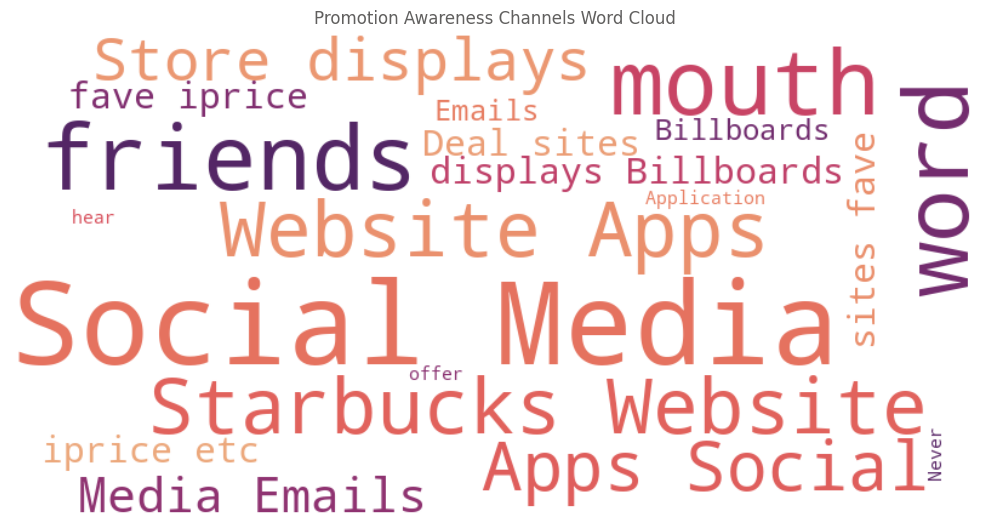

In [22]:
promotion_awareness_data = df_sb['Promotion Awareness'].dropna()
promotion_awareness_text = ' '.join(promotion_awareness_data)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=palette_cont).generate(promotion_awareness_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Promotion Awareness Channels Word Cloud', fontsize=12, color=label_color)

plt.tight_layout()
plt.show()

**Starbucks Visit Frequency**- Column Chart

In [23]:
visit_frequency_data = df_sb['Visit Frequency'].dropna()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_sb, x='Visit Frequency', order=['Rarely', 'Monthly', 'Weekly', 'Daily'], color=palette[2], width=0.5)

plt.title('Starbucks Visit Frequency', color=label_color, fontsize=12)
plt.xlabel('Visit Frequency', color=label_color)
plt.ylabel('Number of Respondents', color=label_color)

plt.grid(True, axis='y', color=label_color, linestyle='--', alpha=0.4)

plt.gca().spines['bottom'].set_color(label_color)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.tight_layout()
plt.show()